# Day 49 - Implementing CNNs for Image Classification

Welcome to Day 49 of the 100 Days of Machine Learning Challenge! Today, we dive deep into the practical implementation of Convolutional Neural Networks (CNNs) for image classification tasks.

## Introduction

Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision and image recognition. Since AlexNet's breakthrough performance in the 2012 ImageNet competition, CNNs have become the dominant architecture for processing visual data. They power everything from facial recognition systems and autonomous vehicles to medical imaging diagnostics and content moderation systems.

Unlike traditional fully connected neural networks that treat images as flat vectors of pixels, CNNs preserve and exploit the spatial structure of images. This spatial awareness allows CNNs to detect patterns like edges, textures, and shapes in a hierarchical manner - learning simple features in early layers and combining them into complex patterns in deeper layers.

In this lesson, we will move beyond theory and build actual CNN models from scratch using TensorFlow and Keras. You'll learn how to construct CNN architectures, train them on real image datasets, and evaluate their performance on classification tasks.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the complete architecture of CNNs including convolutional, pooling, and fully connected layers
- Implement CNN models using TensorFlow and Keras for image classification
- Apply data preprocessing techniques specific to image data
- Train and evaluate CNN models on real-world datasets
- Visualize training progress and model performance metrics
- Apply regularization techniques like dropout to prevent overfitting in CNNs

## Theory: CNN Architecture and Components

### Understanding CNN Layers

A typical CNN architecture consists of three main types of layers that work together to learn hierarchical representations from images:

#### 1. Convolutional Layers

The convolutional layer is the core building block of a CNN. It applies a set of learnable filters (also called kernels) to the input image. Each filter slides across the image, performing element-wise multiplication and summing the results to produce a feature map.

**Mathematical Operation:**

For an input image $I$ and a filter $K$ of size $k \times k$, the convolution operation at position $(i,j)$ is:

$$S(i,j) = (I * K)(i,j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} I(i+m, j+n) \cdot K(m,n)$$

Where:
- $S(i,j)$ is the output feature map value at position $(i,j)$
- $I(i+m, j+n)$ represents pixel values from the input image
- $K(m,n)$ represents the filter weights
- $*$ denotes the convolution operation

**Key Parameters:**
- **Number of filters**: Determines how many different features to detect
- **Filter size**: Typically $3 \times 3$ or $5 \times 5$
- **Stride**: How many pixels the filter moves at each step
- **Padding**: Adding borders to preserve spatial dimensions

#### 2. Activation Functions

After each convolution operation, we apply a non-linear activation function. The most common choice is ReLU (Rectified Linear Unit):

$$\text{ReLU}(x) = \max(0, x)$$

ReLU introduces non-linearity, allowing the network to learn complex patterns, while being computationally efficient and helping to mitigate the vanishing gradient problem.

#### 3. Pooling Layers

Pooling layers reduce the spatial dimensions of feature maps, which:
- Decreases computational cost
- Reduces the risk of overfitting
- Provides translation invariance

**Max Pooling** (most common):

For a pooling window of size $p \times p$:

$$P(i,j) = \max_{m,n \in \text{window}} S(i \cdot p + m, j \cdot p + n)$$

Typically, a $2 \times 2$ max pooling with stride 2 reduces each spatial dimension by half.

#### 4. Fully Connected Layers

After several convolutional and pooling layers extract features, fully connected (dense) layers perform the final classification. The feature maps are flattened into a 1D vector and passed through one or more dense layers.

The output layer uses a softmax activation function for multi-class classification:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

Where $K$ is the number of classes, and $z_i$ is the raw output for class $i$.

#### 5. Dropout Regularization

Dropout randomly sets a fraction $p$ of neurons to zero during training, which prevents co-adaptation of neurons and reduces overfitting:

$$h'_i = \begin{cases} 
0 & \text{with probability } p \\
\frac{h_i}{1-p} & \text{with probability } 1-p
\end{cases}$$

### Why CNNs Work for Images

CNNs are particularly effective for image processing due to three key properties:

1. **Local Connectivity**: Each neuron connects only to a local region of the input, matching how visual features are spatially localized
2. **Parameter Sharing**: The same filter is applied across the entire image, dramatically reducing parameters compared to fully connected networks
3. **Translation Invariance**: Features detected in one part of the image can be recognized anywhere, thanks to weight sharing

## Setup: Import Required Libraries

We'll use TensorFlow/Keras for building our CNN, along with NumPy for numerical operations and Matplotlib for visualization.

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

2025-11-09 03:03:20.173468: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 03:03:20.174048: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 03:03:20.265067: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-11-09 03:03:24.259363: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 03:03:24.274505: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


TensorFlow version: 2.20.0


## Loading and Exploring the Dataset

We'll use the Fashion-MNIST dataset, which contains 70,000 grayscale images of fashion items in 10 categories. Each image is 28x28 pixels.

### Fashion-MNIST Classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

This dataset is more challenging than MNIST digits while still being small enough to train quickly on standard hardware.

In [2]:
# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names for interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display dataset information
print("Dataset Information:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")
print(f"Number of classes: {len(class_names)}")
print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")

    0/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


       0/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 5545984/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

11616256/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

17219584/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

22593536/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


   0/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


      0/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dataset Information:
Training samples: 60000
Test samples: 10000
Image shape: (28, 28)
Number of classes: 10

Pixel value range: [0, 255]


### Visualizing Sample Images

Let's visualize some examples from our dataset to understand what we're working with.

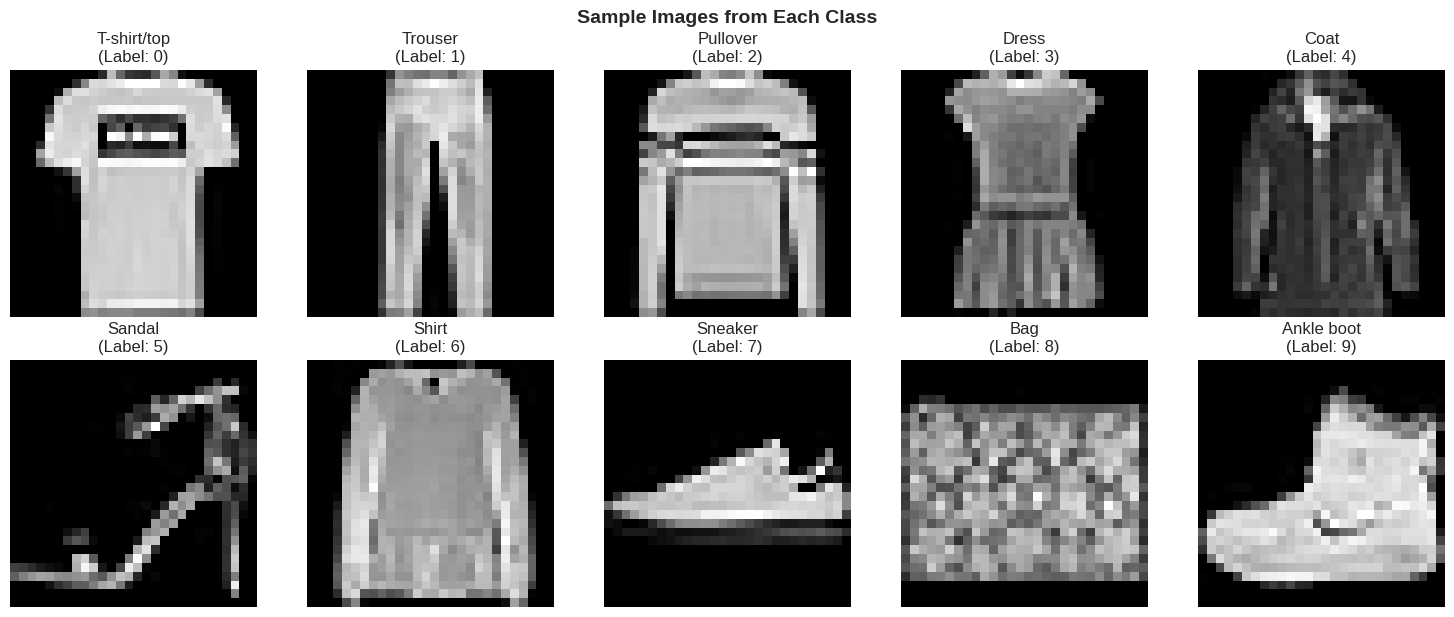


Class distribution in training set:
T-shirt/top    :  6000 images (10.0%)
Trouser        :  6000 images (10.0%)
Pullover       :  6000 images (10.0%)
Dress          :  6000 images (10.0%)
Coat           :  6000 images (10.0%)
Sandal         :  6000 images (10.0%)
Shirt          :  6000 images (10.0%)
Sneaker        :  6000 images (10.0%)
Bag            :  6000 images (10.0%)
Ankle boot     :  6000 images (10.0%)


In [3]:
# Visualize sample images from each class
plt.figure(figsize=(15, 6))
for i in range(10):
    # Find first occurrence of each class
    idx = np.where(y_train == i)[0][0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"{class_names[i]}\n(Label: {i})")
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Sample Images from Each Class', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nClass distribution in training set:")
for label, count in zip(class_names, counts):
    print(f"{label:15s}: {count:5d} images ({count/len(y_train)*100:.1f}%)")

## Data Preprocessing

Proper data preprocessing is crucial for training neural networks effectively:

1. **Normalization**: Scale pixel values from [0, 255] to [0, 1]
2. **Reshaping**: Add a channel dimension for CNN input (grayscale = 1 channel)
3. **Label Encoding**: Convert labels to one-hot encoded vectors for categorical cross-entropy

In [4]:
# Normalize pixel values to [0, 1] range
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape to add channel dimension: (samples, height, width, channels)
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("Preprocessed Data Shapes:")
print(f"X_train: {X_train_reshaped.shape}")
print(f"y_train: {y_train_encoded.shape}")
print(f"X_test: {X_test_reshaped.shape}")
print(f"y_test: {y_test_encoded.shape}")

print(f"\nNormalized pixel range: [{X_train_reshaped.min():.2f}, {X_train_reshaped.max():.2f}]")
print(f"\nExample one-hot encoding for label {y_train[0]}:")
print(y_train_encoded[0])

Preprocessed Data Shapes:
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)

Normalized pixel range: [0.00, 1.00]

Example one-hot encoding for label 9:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building a CNN Model

Now we'll construct a CNN architecture with the following structure:

1. **First Convolutional Block**:
   - Conv2D layer: 32 filters, 3×3 kernel, ReLU activation
   - MaxPooling2D: 2×2 pool size

2. **Second Convolutional Block**:
   - Conv2D layer: 64 filters, 3×3 kernel, ReLU activation
   - MaxPooling2D: 2×2 pool size

3. **Third Convolutional Block**:
   - Conv2D layer: 128 filters, 3×3 kernel, ReLU activation
   - MaxPooling2D: 2×2 pool size

4. **Fully Connected Layers**:
   - Flatten layer
   - Dense layer: 128 neurons, ReLU activation
   - Dropout: 0.5 probability
   - Dense output layer: 10 neurons (one per class), softmax activation

This architecture progressively increases the number of filters while reducing spatial dimensions, a common pattern in CNN design.

In [5]:
# Build the CNN model using Keras Sequential API
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

# Calculate total parameters
trainable_params = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
print(f"\nTotal trainable parameters: {trainable_params:,}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-09 03:03:27.554615: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: 'Variable' object has no attribute 'get_shape'

## Compiling the Model

Before training, we need to compile the model by specifying:

- **Optimizer**: Adam (adaptive learning rate optimization)
- **Loss function**: Categorical cross-entropy (for multi-class classification)
- **Metrics**: Accuracy (percentage of correct predictions)

The categorical cross-entropy loss for true label $y$ and predicted probabilities $\hat{y}$ is:

$$L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)$$

where $K$ is the number of classes.

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")
print("\nOptimizer: Adam")
print("Loss function: Categorical Crossentropy")
print("Metrics: Accuracy")

Model compiled successfully!

Optimizer: Adam
Loss function: Categorical Crossentropy
Metrics: Accuracy


## Training the CNN

Now we'll train our model on the training data. We'll use:

- **Batch size**: 128 (number of samples processed before updating weights)
- **Epochs**: 10 (number of complete passes through the training dataset)
- **Validation split**: 0.1 (10% of training data used for validation)

The training process involves:
1. Forward propagation: Computing predictions
2. Loss calculation: Measuring error
3. Backpropagation: Computing gradients
4. Weight updates: Adjusting parameters to minimize loss

In [7]:
# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_encoded,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 20:28 3s/step - accuracy: 0.1562 - loss: 2.2891

  4/422 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1759 - loss: 2.2737 

  7/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1912 - loss: 2.2517

 10/422 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2131 - loss: 2.2196

 13/422 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2306 - loss: 2.1805

 16/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2469 - loss: 2.1393

 19/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2622 - loss: 2.0976

 22/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2768 - loss: 2.0562

 25/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2905 - loss: 2.0157

 28/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3035 - loss: 1.9770

 31/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3156 - loss: 1.9408

 34/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3268 - loss: 1.9070

 37/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3370 - loss: 1.8755

 40/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3468 - loss: 1.8459

 44/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3591 - loss: 1.8091

 48/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3707 - loss: 1.7750

 52/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3815 - loss: 1.7434

 55/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3891 - loss: 1.7210

 58/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3964 - loss: 1.6996

 61/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4034 - loss: 1.6793

 64/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4101 - loss: 1.6599

 67/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4166 - loss: 1.6412

 71/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4249 - loss: 1.6174

 74/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4308 - loss: 1.6004

 78/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4384 - loss: 1.5789

 82/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4456 - loss: 1.5584

 86/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4524 - loss: 1.5389

 90/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4589 - loss: 1.5202

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4636 - loss: 1.5068

 96/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4681 - loss: 1.4939

 99/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4724 - loss: 1.4814

103/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4779 - loss: 1.4656

107/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4832 - loss: 1.4503

111/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4883 - loss: 1.4357

115/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4932 - loss: 1.4216

119/422 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4979 - loss: 1.4080

123/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5024 - loss: 1.3950

127/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5067 - loss: 1.3825

130/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5099 - loss: 1.3734

134/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5139 - loss: 1.3616

138/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5179 - loss: 1.3503

142/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5217 - loss: 1.3393

146/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5254 - loss: 1.3287

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5280 - loss: 1.3209

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5315 - loss: 1.3109

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5349 - loss: 1.3012

161/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5382 - loss: 1.2917

165/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5414 - loss: 1.2826

169/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5445 - loss: 1.2737

173/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5476 - loss: 1.2650

177/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5505 - loss: 1.2567

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5533 - loss: 1.2485

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5561 - loss: 1.2406

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5588 - loss: 1.2328

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5615 - loss: 1.2253

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5641 - loss: 1.2179

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5666 - loss: 1.2107

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5691 - loss: 1.2037

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5715 - loss: 1.1969

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5738 - loss: 1.1902

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5761 - loss: 1.1837

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5783 - loss: 1.1773

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5805 - loss: 1.1711

229/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5826 - loss: 1.1650

233/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5846 - loss: 1.1591

237/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5867 - loss: 1.1533

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5887 - loss: 1.1476

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5901 - loss: 1.1434

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5921 - loss: 1.1379

252/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5939 - loss: 1.1325

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5958 - loss: 1.1273

260/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5976 - loss: 1.1221

264/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5993 - loss: 1.1171

268/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6011 - loss: 1.1122

272/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6028 - loss: 1.1073

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6044 - loss: 1.1026

280/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6061 - loss: 1.0979

283/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6073 - loss: 1.0944

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6088 - loss: 1.0899

291/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6104 - loss: 1.0854

295/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6119 - loss: 1.0811

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6134 - loss: 1.0767

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6149 - loss: 1.0725

307/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6164 - loss: 1.0683

311/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6178 - loss: 1.0642

315/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6192 - loss: 1.0602

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6206 - loss: 1.0562

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6220 - loss: 1.0523

327/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6233 - loss: 1.0484

331/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6247 - loss: 1.0446

335/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6260 - loss: 1.0409

339/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6273 - loss: 1.0372

342/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6282 - loss: 1.0344

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6292 - loss: 1.0317

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6304 - loss: 1.0282

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6313 - loss: 1.0255

356/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6326 - loss: 1.0220

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6338 - loss: 1.0186

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6349 - loss: 1.0152

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6361 - loss: 1.0119

371/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6370 - loss: 1.0094

374/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6379 - loss: 1.0070

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6390 - loss: 1.0037

382/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6401 - loss: 1.0005

386/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6413 - loss: 0.9974

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6424 - loss: 0.9943

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6434 - loss: 0.9912

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6442 - loss: 0.9889

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6453 - loss: 0.9859

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6463 - loss: 0.9830

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6474 - loss: 0.9800

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6484 - loss: 0.9771

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6494 - loss: 0.9743

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6504 - loss: 0.9715

422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7548 - loss: 0.6755 - val_accuracy: 0.8590 - val_loss: 0.3772


Epoch 2/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8125 - loss: 0.4829

  5/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8289 - loss: 0.4588 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8306 - loss: 0.4591

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8306 - loss: 0.4595

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8319 - loss: 0.4593

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8342 - loss: 0.4567

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8362 - loss: 0.4541

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8377 - loss: 0.4519

 33/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8388 - loss: 0.4504

 37/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8394 - loss: 0.4497

 41/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8397 - loss: 0.4495

 45/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8400 - loss: 0.4493

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8401 - loss: 0.4491

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8401 - loss: 0.4491

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8402 - loss: 0.4488

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8403 - loss: 0.4488

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8403 - loss: 0.4486

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8404 - loss: 0.4483

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8405 - loss: 0.4480

 76/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8406 - loss: 0.4477

 80/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8407 - loss: 0.4473

 83/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8408 - loss: 0.4470

 86/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8409 - loss: 0.4466

 90/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8410 - loss: 0.4461

 94/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8412 - loss: 0.4457

 97/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8413 - loss: 0.4454

101/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8414 - loss: 0.4451

105/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8415 - loss: 0.4448

109/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8416 - loss: 0.4445

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8417 - loss: 0.4441

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8418 - loss: 0.4438

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8419 - loss: 0.4435

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8420 - loss: 0.4432

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8421 - loss: 0.4429

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8422 - loss: 0.4427

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8422 - loss: 0.4426

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8423 - loss: 0.4423

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8424 - loss: 0.4421

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8425 - loss: 0.4419

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8426 - loss: 0.4417

156/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8427 - loss: 0.4415

160/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8428 - loss: 0.4413

164/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8429 - loss: 0.4410

167/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8430 - loss: 0.4408

171/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8431 - loss: 0.4406

175/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8432 - loss: 0.4404

179/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8433 - loss: 0.4402

183/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8434 - loss: 0.4399

187/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8435 - loss: 0.4397

191/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8436 - loss: 0.4394

195/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8437 - loss: 0.4392

198/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8438 - loss: 0.4390

202/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8439 - loss: 0.4388

206/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8440 - loss: 0.4386

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8441 - loss: 0.4384

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8441 - loss: 0.4382

215/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8442 - loss: 0.4380

218/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8443 - loss: 0.4378

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8443 - loss: 0.4377

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8444 - loss: 0.4374

229/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8445 - loss: 0.4372

232/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8446 - loss: 0.4371

236/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8447 - loss: 0.4369

240/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8447 - loss: 0.4366

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8448 - loss: 0.4364

247/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8449 - loss: 0.4363

250/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8449 - loss: 0.4362

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8450 - loss: 0.4360

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8451 - loss: 0.4359

259/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8451 - loss: 0.4357

262/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8452 - loss: 0.4356

266/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8453 - loss: 0.4354

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8453 - loss: 0.4353

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8454 - loss: 0.4352

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8454 - loss: 0.4350

279/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8455 - loss: 0.4349

283/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8455 - loss: 0.4348

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8456 - loss: 0.4346

290/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8456 - loss: 0.4345

293/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8457 - loss: 0.4344

296/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8457 - loss: 0.4342

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8458 - loss: 0.4341

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8458 - loss: 0.4339

307/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8459 - loss: 0.4338

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8459 - loss: 0.4336

314/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8460 - loss: 0.4335

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8461 - loss: 0.4333

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8461 - loss: 0.4332

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8462 - loss: 0.4330

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8462 - loss: 0.4328

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8463 - loss: 0.4326

336/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8464 - loss: 0.4325

340/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8464 - loss: 0.4323

344/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8465 - loss: 0.4321

347/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8465 - loss: 0.4320

351/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8466 - loss: 0.4318

355/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8467 - loss: 0.4316

358/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8467 - loss: 0.4315

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8468 - loss: 0.4313

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8468 - loss: 0.4312

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8469 - loss: 0.4311

370/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8469 - loss: 0.4309

374/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8470 - loss: 0.4307

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8470 - loss: 0.4306

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8471 - loss: 0.4304

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8471 - loss: 0.4303

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8472 - loss: 0.4301

391/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8473 - loss: 0.4299

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8473 - loss: 0.4297

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8474 - loss: 0.4295

402/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8475 - loss: 0.4294

406/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8475 - loss: 0.4292

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8476 - loss: 0.4290

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8476 - loss: 0.4289

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8477 - loss: 0.4287

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8477 - loss: 0.4286

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8547 - loss: 0.4077 - val_accuracy: 0.8783 - val_loss: 0.3187


Epoch 3/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8359 - loss: 0.4107

  4/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8532 - loss: 0.3878 

  7/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8591 - loss: 0.3829

 10/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8633 - loss: 0.3746

 14/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8662 - loss: 0.3704

 17/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8678 - loss: 0.3690

 20/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8690 - loss: 0.3675

 24/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8699 - loss: 0.3668

 28/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8708 - loss: 0.3657

 32/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8713 - loss: 0.3656

 36/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8714 - loss: 0.3657

 40/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8713 - loss: 0.3661

 43/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8714 - loss: 0.3661

 47/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8713 - loss: 0.3662

 51/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8712 - loss: 0.3665

 55/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8712 - loss: 0.3667

 58/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8712 - loss: 0.3667

 62/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8713 - loss: 0.3668

 66/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8713 - loss: 0.3666

 70/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8714 - loss: 0.3663

 74/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8715 - loss: 0.3661

 78/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8716 - loss: 0.3658

 82/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8718 - loss: 0.3655

 86/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8719 - loss: 0.3651

 90/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8721 - loss: 0.3648

 94/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8722 - loss: 0.3645

 98/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8723 - loss: 0.3643

102/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8724 - loss: 0.3642

105/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8724 - loss: 0.3641

108/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8725 - loss: 0.3640

111/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8725 - loss: 0.3639

114/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8726 - loss: 0.3638

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8726 - loss: 0.3637

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8726 - loss: 0.3637

124/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8726 - loss: 0.3636

127/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3635

130/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3635

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3635

136/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3634

139/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3634

142/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3633

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3633

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8727 - loss: 0.3632

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8727 - loss: 0.3631

155/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8727 - loss: 0.3630

158/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8727 - loss: 0.3630

161/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8727 - loss: 0.3629

164/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3628

167/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3627

170/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3627

173/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3626

176/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3626

179/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3625

182/422 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8728 - loss: 0.3624

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8728 - loss: 0.3624

188/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8729 - loss: 0.3623

191/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8729 - loss: 0.3622

194/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8729 - loss: 0.3621

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8730 - loss: 0.3619

200/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8730 - loss: 0.3619

203/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8730 - loss: 0.3617

206/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8730 - loss: 0.3616

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8731 - loss: 0.3615

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8731 - loss: 0.3614

215/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8731 - loss: 0.3613

218/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8731 - loss: 0.3612

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8731 - loss: 0.3612

224/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8732 - loss: 0.3611

227/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8732 - loss: 0.3610

230/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8732 - loss: 0.3609

233/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8732 - loss: 0.3608

236/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8732 - loss: 0.3607

239/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8733 - loss: 0.3606

242/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8733 - loss: 0.3606

245/422 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8733 - loss: 0.3605

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3604

251/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3603

254/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3602

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3602

260/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3601

263/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3600

266/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3600

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3599

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3599

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3598

279/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8734 - loss: 0.3598

282/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3598

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3597

288/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3597

291/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3597

294/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3596

297/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3596

300/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3595

303/422 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8733 - loss: 0.3595

306/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3595

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3594

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3593

316/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3593

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3593

322/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3592

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3592

328/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3591

331/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3590

334/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3590

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3589

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3589

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3588

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3587

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3587

357/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3586

361/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8733 - loss: 0.3585

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3585

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3584

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3583

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3582

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3581

384/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3580

388/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3580

392/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3579

396/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3578

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3577

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3577

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3576

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3575

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3574

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3573

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8744 - loss: 0.3476 - val_accuracy: 0.8903 - val_loss: 0.2861


Epoch 4/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8594 - loss: 0.3790

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8752 - loss: 0.3521 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8816 - loss: 0.3389

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8848 - loss: 0.3295

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8871 - loss: 0.3246

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8886 - loss: 0.3200

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8894 - loss: 0.3167

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8901 - loss: 0.3143

 33/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8904 - loss: 0.3129

 37/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8906 - loss: 0.3119

 41/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8906 - loss: 0.3114

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8906 - loss: 0.3109

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8905 - loss: 0.3107

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8904 - loss: 0.3106

 56/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3105

 60/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3103

 64/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3101

 67/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3099

 70/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3098

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3096

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3095

 80/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3093

 84/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3092

 88/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8904 - loss: 0.3090

 92/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8904 - loss: 0.3090

 96/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8904 - loss: 0.3089

 99/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3089

103/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3090

107/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8903 - loss: 0.3091

111/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8902 - loss: 0.3091

114/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8902 - loss: 0.3091

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8902 - loss: 0.3091

120/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8901 - loss: 0.3091

124/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8901 - loss: 0.3091

128/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8900 - loss: 0.3092

132/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8900 - loss: 0.3093

136/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8899 - loss: 0.3094

140/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8898 - loss: 0.3095

144/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8898 - loss: 0.3096

148/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8897 - loss: 0.3097

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8896 - loss: 0.3098

156/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8896 - loss: 0.3099

160/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8895 - loss: 0.3100

164/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8895 - loss: 0.3100

168/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8894 - loss: 0.3101

172/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8894 - loss: 0.3102

175/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8893 - loss: 0.3103

178/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8893 - loss: 0.3104

182/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8893 - loss: 0.3105

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8892 - loss: 0.3105

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8892 - loss: 0.3106

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8892 - loss: 0.3106

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3107

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3107

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3107

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3107

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3107

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3108

220/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3108

224/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8891 - loss: 0.3108

228/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8890 - loss: 0.3109

232/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8890 - loss: 0.3109

236/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8890 - loss: 0.3109

240/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8890 - loss: 0.3110

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8890 - loss: 0.3110

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8890 - loss: 0.3111

252/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8890 - loss: 0.3111

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3112

260/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3112

264/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3113

268/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3113

272/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3114

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8889 - loss: 0.3115

280/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8888 - loss: 0.3115

284/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8888 - loss: 0.3116

288/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8888 - loss: 0.3116

292/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8888 - loss: 0.3117

296/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8888 - loss: 0.3117

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8888 - loss: 0.3118

304/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3118

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3118

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3119

316/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3119

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3119

324/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3119

328/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3119

332/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3120

336/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8887 - loss: 0.3120

340/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8886 - loss: 0.3120

344/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8886 - loss: 0.3120

348/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8886 - loss: 0.3120

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8886 - loss: 0.3120

356/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8886 - loss: 0.3120

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3120

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3120

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3120

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3119

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3119

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3119

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3119

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3118

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3118

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3118

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.3118

402/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3118

406/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3118

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3118

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3117

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3117

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.3117

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8896 - loss: 0.3086 - val_accuracy: 0.9015 - val_loss: 0.2606


Epoch 5/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8828 - loss: 0.2865

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8910 - loss: 0.2909 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8944 - loss: 0.2886

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8963 - loss: 0.2845

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8974 - loss: 0.2846

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8986 - loss: 0.2835

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8992 - loss: 0.2822

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8994 - loss: 0.2811

 33/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8994 - loss: 0.2804

 37/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8994 - loss: 0.2801

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8995 - loss: 0.2800

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8996 - loss: 0.2801

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8996 - loss: 0.2803

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8995 - loss: 0.2808

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8994 - loss: 0.2812

 60/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2815

 64/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2817

 67/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2819

 71/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2820

 75/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2822

 79/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2823

 83/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8993 - loss: 0.2824

 87/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8992 - loss: 0.2824

 91/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8992 - loss: 0.2824

 95/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8992 - loss: 0.2824

 99/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8992 - loss: 0.2825

103/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8991 - loss: 0.2825

107/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8991 - loss: 0.2826

110/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8990 - loss: 0.2826

114/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8990 - loss: 0.2826

118/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8989 - loss: 0.2827

122/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8988 - loss: 0.2828

126/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8987 - loss: 0.2828

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8986 - loss: 0.2829

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8985 - loss: 0.2830

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8984 - loss: 0.2832

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8983 - loss: 0.2833

144/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8982 - loss: 0.2834

148/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8982 - loss: 0.2834

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8981 - loss: 0.2835

156/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8980 - loss: 0.2836

160/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8980 - loss: 0.2837

164/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8979 - loss: 0.2838

168/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8979 - loss: 0.2839

172/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8978 - loss: 0.2840

176/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8978 - loss: 0.2841

180/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8977 - loss: 0.2842

184/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8977 - loss: 0.2843

188/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8977 - loss: 0.2843

192/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8977 - loss: 0.2843

196/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8977 - loss: 0.2844

200/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2844

204/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2844

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2844

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2844

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2845

220/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2845

224/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2845

228/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2845

231/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8976 - loss: 0.2845

234/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8976 - loss: 0.2845

238/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8976 - loss: 0.2845

242/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8976 - loss: 0.2845

246/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8976 - loss: 0.2846

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2846

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2846

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2846

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2846

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2846

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2847

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8975 - loss: 0.2847

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8974 - loss: 0.2848

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8974 - loss: 0.2848

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8974 - loss: 0.2848

289/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8974 - loss: 0.2849

293/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8974 - loss: 0.2849

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8974 - loss: 0.2849

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8974 - loss: 0.2850

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8974 - loss: 0.2850

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2850

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2851

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2851

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2851

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2851

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8973 - loss: 0.2851

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2852

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2852

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2852

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2852

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2853

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2853

357/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8972 - loss: 0.2853

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2853

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2853

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2853

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2852

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8971 - loss: 0.2851

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8970 - loss: 0.2851

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8968 - loss: 0.2823 - val_accuracy: 0.8997 - val_loss: 0.2593


Epoch 6/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9062 - loss: 0.2594

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9133 - loss: 0.2644 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9133 - loss: 0.2614

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9129 - loss: 0.2580

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9122 - loss: 0.2582

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9121 - loss: 0.2579

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9123 - loss: 0.2573

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9123 - loss: 0.2567

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9121 - loss: 0.2568

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9117 - loss: 0.2573

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9114 - loss: 0.2580

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9111 - loss: 0.2584

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9109 - loss: 0.2588

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9107 - loss: 0.2592

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9106 - loss: 0.2594

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9105 - loss: 0.2596

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9104 - loss: 0.2596

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9104 - loss: 0.2597

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9103 - loss: 0.2598

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9102 - loss: 0.2598

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9101 - loss: 0.2599

 85/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9100 - loss: 0.2599

 89/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9100 - loss: 0.2598

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9099 - loss: 0.2598

 97/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9099 - loss: 0.2598

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9098 - loss: 0.2598

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9097 - loss: 0.2598

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9096 - loss: 0.2598

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9095 - loss: 0.2598

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9095 - loss: 0.2598

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9094 - loss: 0.2598

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9093 - loss: 0.2599

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9092 - loss: 0.2599

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9091 - loss: 0.2600

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9091 - loss: 0.2601

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9090 - loss: 0.2601

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9089 - loss: 0.2602

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9088 - loss: 0.2603

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9088 - loss: 0.2604

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9087 - loss: 0.2604

161/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9086 - loss: 0.2605

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9086 - loss: 0.2606

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9085 - loss: 0.2607

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9084 - loss: 0.2607

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9084 - loss: 0.2608

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9083 - loss: 0.2609

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9083 - loss: 0.2609

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9082 - loss: 0.2610

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9082 - loss: 0.2610

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9082 - loss: 0.2610

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9081 - loss: 0.2610

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9081 - loss: 0.2610

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9081 - loss: 0.2610

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9080 - loss: 0.2610

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9080 - loss: 0.2610

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9080 - loss: 0.2610

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9080 - loss: 0.2610

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9080 - loss: 0.2611

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9079 - loss: 0.2611

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9079 - loss: 0.2611

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9079 - loss: 0.2611

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9079 - loss: 0.2611

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9078 - loss: 0.2611

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9078 - loss: 0.2612

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9078 - loss: 0.2612

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9078 - loss: 0.2612

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9078 - loss: 0.2612

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9077 - loss: 0.2613

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9077 - loss: 0.2613

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9077 - loss: 0.2614

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9076 - loss: 0.2614

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9076 - loss: 0.2614

289/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9076 - loss: 0.2615

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9076 - loss: 0.2615

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9076 - loss: 0.2615

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.2615

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.2616

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.2616

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.2616

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.2616

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9074 - loss: 0.2616

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9074 - loss: 0.2616

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9074 - loss: 0.2616

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9074 - loss: 0.2616

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9074 - loss: 0.2616

340/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9073 - loss: 0.2616

344/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9073 - loss: 0.2617

348/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9073 - loss: 0.2617

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9073 - loss: 0.2617

356/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9073 - loss: 0.2617

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

371/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

375/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.2617

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

391/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - loss: 0.2616

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9070 - loss: 0.2616

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9070 - loss: 0.2616

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9059 - loss: 0.2598 - val_accuracy: 0.9092 - val_loss: 0.2386


Epoch 7/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9219 - loss: 0.2216

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9127 - loss: 0.2386 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9113 - loss: 0.2477

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9120 - loss: 0.2468

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9122 - loss: 0.2470

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9128 - loss: 0.2456

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9132 - loss: 0.2441

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9137 - loss: 0.2430

 33/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9138 - loss: 0.2426

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9138 - loss: 0.2423

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9139 - loss: 0.2420

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9140 - loss: 0.2417

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9141 - loss: 0.2415

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9140 - loss: 0.2416

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9139 - loss: 0.2416

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9139 - loss: 0.2418

 64/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9139 - loss: 0.2419

 67/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9140 - loss: 0.2420

 71/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9140 - loss: 0.2420

 75/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9141 - loss: 0.2421

 79/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9141 - loss: 0.2422

 83/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9141 - loss: 0.2423

 87/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9142 - loss: 0.2423

 91/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9142 - loss: 0.2423

 95/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9142 - loss: 0.2424

 99/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9142 - loss: 0.2424

103/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9141 - loss: 0.2425

107/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9141 - loss: 0.2426

111/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9140 - loss: 0.2427

115/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9140 - loss: 0.2428

119/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9139 - loss: 0.2429

123/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9139 - loss: 0.2430

127/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9138 - loss: 0.2431

131/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9137 - loss: 0.2432

135/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9137 - loss: 0.2434

139/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9136 - loss: 0.2435

143/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9136 - loss: 0.2436

147/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9135 - loss: 0.2437

151/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9134 - loss: 0.2438

155/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9134 - loss: 0.2438

159/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9133 - loss: 0.2439

163/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9132 - loss: 0.2440

167/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9132 - loss: 0.2441

171/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9131 - loss: 0.2441

175/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9131 - loss: 0.2442

179/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9130 - loss: 0.2443

183/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9130 - loss: 0.2444

187/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9129 - loss: 0.2445

191/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9129 - loss: 0.2445

195/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9128 - loss: 0.2446

199/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9128 - loss: 0.2446

203/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9128 - loss: 0.2447

207/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9128 - loss: 0.2447

211/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9127 - loss: 0.2447

215/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9127 - loss: 0.2447

219/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9127 - loss: 0.2448

223/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9127 - loss: 0.2448

227/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9127 - loss: 0.2448

231/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9127 - loss: 0.2448

235/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2449

239/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2449

243/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2449

247/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2450

251/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2450

255/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9126 - loss: 0.2450

259/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9125 - loss: 0.2451

263/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9125 - loss: 0.2451

267/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9125 - loss: 0.2451

271/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9125 - loss: 0.2452

275/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9124 - loss: 0.2452

279/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9124 - loss: 0.2452

283/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9124 - loss: 0.2452

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9124 - loss: 0.2453

291/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9123 - loss: 0.2453

295/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9123 - loss: 0.2453

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9123 - loss: 0.2453

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9123 - loss: 0.2454

307/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9123 - loss: 0.2454

311/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

315/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

327/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

331/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9122 - loss: 0.2454

335/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

339/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

343/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

347/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

351/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

355/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9121 - loss: 0.2454

359/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

363/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

371/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

374/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2454

382/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2453

386/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2453

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2453

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2453

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2453

402/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2452

406/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2452

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2452

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9120 - loss: 0.2452

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9119 - loss: 0.2451

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9119 - loss: 0.2451

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9114 - loss: 0.2424 - val_accuracy: 0.9118 - val_loss: 0.2329


Epoch 8/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9297 - loss: 0.2293

  5/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9300 - loss: 0.2190 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9283 - loss: 0.2219

 13/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9278 - loss: 0.2233

 17/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9273 - loss: 0.2243

 21/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9271 - loss: 0.2236

 25/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9272 - loss: 0.2223

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9270 - loss: 0.2215

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9266 - loss: 0.2213

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9261 - loss: 0.2214

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9257 - loss: 0.2217

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9253 - loss: 0.2218

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9250 - loss: 0.2219

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9247 - loss: 0.2223

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9244 - loss: 0.2226

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9240 - loss: 0.2229

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9238 - loss: 0.2232

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9236 - loss: 0.2233

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9234 - loss: 0.2234

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9232 - loss: 0.2235

 81/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9231 - loss: 0.2236

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9230 - loss: 0.2236

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9228 - loss: 0.2235

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9227 - loss: 0.2235

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9227 - loss: 0.2235

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9226 - loss: 0.2235

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9224 - loss: 0.2235

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9223 - loss: 0.2235

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9222 - loss: 0.2235

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9222 - loss: 0.2235

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9220 - loss: 0.2235

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9219 - loss: 0.2235

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9218 - loss: 0.2236

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9217 - loss: 0.2236

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9216 - loss: 0.2237

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9215 - loss: 0.2238

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9214 - loss: 0.2239

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9213 - loss: 0.2240

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9212 - loss: 0.2241

156/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9211 - loss: 0.2241

160/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9211 - loss: 0.2242

164/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9210 - loss: 0.2243

168/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9209 - loss: 0.2244

172/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9209 - loss: 0.2244

176/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9208 - loss: 0.2245

180/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9208 - loss: 0.2245

183/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9207 - loss: 0.2246

187/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9207 - loss: 0.2246

190/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9207 - loss: 0.2246

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9206 - loss: 0.2246

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9206 - loss: 0.2246

200/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9205 - loss: 0.2246

204/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9205 - loss: 0.2247

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9205 - loss: 0.2247

211/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9204 - loss: 0.2247

215/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9204 - loss: 0.2247

219/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9204 - loss: 0.2247

223/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9204 - loss: 0.2247

227/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9203 - loss: 0.2247

231/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9203 - loss: 0.2248

235/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9203 - loss: 0.2248

239/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9202 - loss: 0.2248

243/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9202 - loss: 0.2249

246/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9202 - loss: 0.2249

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9202 - loss: 0.2249

252/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9201 - loss: 0.2250

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9201 - loss: 0.2250

259/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9201 - loss: 0.2250

263/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9200 - loss: 0.2251

267/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9200 - loss: 0.2251

271/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9200 - loss: 0.2252

275/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9199 - loss: 0.2253

279/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9199 - loss: 0.2253

283/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9199 - loss: 0.2254

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9198 - loss: 0.2254

291/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9198 - loss: 0.2255

295/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9198 - loss: 0.2255

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9197 - loss: 0.2256

302/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9197 - loss: 0.2256

306/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9197 - loss: 0.2257

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9196 - loss: 0.2257

314/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9196 - loss: 0.2257

318/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9196 - loss: 0.2258

322/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9196 - loss: 0.2258

326/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9195 - loss: 0.2259

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9195 - loss: 0.2259

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9195 - loss: 0.2259

336/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9195 - loss: 0.2260

339/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9195 - loss: 0.2260

342/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9194 - loss: 0.2260

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9194 - loss: 0.2261

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9194 - loss: 0.2261

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9194 - loss: 0.2261

356/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9194 - loss: 0.2262

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9194 - loss: 0.2262

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2262

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2262

370/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2262

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2262

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2263

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2263

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2263

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9193 - loss: 0.2263

391/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9192 - loss: 0.2263

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9184 - loss: 0.2259 - val_accuracy: 0.9115 - val_loss: 0.2397


Epoch 9/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9219 - loss: 0.2029

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9304 - loss: 0.1999 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9319 - loss: 0.2014

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9317 - loss: 0.2003

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9310 - loss: 0.2022

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9302 - loss: 0.2035

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9296 - loss: 0.2040

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9290 - loss: 0.2043

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9284 - loss: 0.2044

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9278 - loss: 0.2047

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9275 - loss: 0.2051

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9273 - loss: 0.2052

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9271 - loss: 0.2053

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9269 - loss: 0.2056

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9267 - loss: 0.2058

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9264 - loss: 0.2062

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9262 - loss: 0.2064

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9261 - loss: 0.2066

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9260 - loss: 0.2069

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9258 - loss: 0.2072

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9257 - loss: 0.2074

 85/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9255 - loss: 0.2076

 89/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9253 - loss: 0.2078

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9252 - loss: 0.2080

 97/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9250 - loss: 0.2081

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9249 - loss: 0.2083

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9247 - loss: 0.2085

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9246 - loss: 0.2087

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9245 - loss: 0.2088

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9244 - loss: 0.2089

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9243 - loss: 0.2089

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9242 - loss: 0.2090

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9241 - loss: 0.2091

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9240 - loss: 0.2092

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9239 - loss: 0.2094

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9239 - loss: 0.2096

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9238 - loss: 0.2097

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9237 - loss: 0.2099

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9236 - loss: 0.2100

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9235 - loss: 0.2101

161/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9235 - loss: 0.2102

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9234 - loss: 0.2103

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9234 - loss: 0.2104

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9233 - loss: 0.2105

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9233 - loss: 0.2106

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9232 - loss: 0.2107

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9232 - loss: 0.2108

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9231 - loss: 0.2108

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9231 - loss: 0.2109

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9231 - loss: 0.2109

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9230 - loss: 0.2110

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9230 - loss: 0.2110

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9230 - loss: 0.2110

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9230 - loss: 0.2110

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9229 - loss: 0.2110

220/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9229 - loss: 0.2111

224/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9229 - loss: 0.2111

228/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9229 - loss: 0.2111

232/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9229 - loss: 0.2111

235/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9229 - loss: 0.2111

238/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9229 - loss: 0.2111

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2111

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2111

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

251/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

254/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

258/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

264/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2112

267/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9228 - loss: 0.2113

271/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2113

274/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2114

278/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2114

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2114

284/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2115

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2115

290/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9227 - loss: 0.2115

293/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9226 - loss: 0.2115

296/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9226 - loss: 0.2116

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9226 - loss: 0.2116

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9226 - loss: 0.2116

307/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9226 - loss: 0.2116

311/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9226 - loss: 0.2117

314/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9226 - loss: 0.2117

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2117

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2117

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2118

326/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2118

330/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2118

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2118

336/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2119

339/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2119

343/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2119

346/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9224 - loss: 0.2119

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9224 - loss: 0.2119

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9224 - loss: 0.2120

355/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9224 - loss: 0.2120

359/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9224 - loss: 0.2120

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

371/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

375/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

386/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9224 - loss: 0.2120

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2120

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2120

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9223 - loss: 0.2121

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9221 - loss: 0.2115 - val_accuracy: 0.9175 - val_loss: 0.2222


Epoch 10/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9297 - loss: 0.1687

  4/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9411 - loss: 0.1606 

  7/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9386 - loss: 0.1723

 11/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9380 - loss: 0.1735

 15/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9356 - loss: 0.1767

 19/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9347 - loss: 0.1781

 23/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9343 - loss: 0.1785

 26/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9340 - loss: 0.1787

 30/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9336 - loss: 0.1795

 34/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9332 - loss: 0.1802

 38/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9328 - loss: 0.1809

 42/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9326 - loss: 0.1815

 46/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9325 - loss: 0.1819

 50/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9323 - loss: 0.1824

 54/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9321 - loss: 0.1828

 58/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9320 - loss: 0.1832

 62/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9319 - loss: 0.1836

 66/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9319 - loss: 0.1839

 70/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9318 - loss: 0.1842

 74/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9318 - loss: 0.1844

 78/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9318 - loss: 0.1847

 82/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9317 - loss: 0.1850

 86/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9316 - loss: 0.1852

 90/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9316 - loss: 0.1854

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9315 - loss: 0.1857

 97/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9314 - loss: 0.1859

101/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9314 - loss: 0.1862

105/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9313 - loss: 0.1865

109/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9312 - loss: 0.1868

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9312 - loss: 0.1870

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9311 - loss: 0.1872

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9310 - loss: 0.1874

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9310 - loss: 0.1876

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9309 - loss: 0.1877

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9308 - loss: 0.1880

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9308 - loss: 0.1882

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9307 - loss: 0.1885

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9306 - loss: 0.1887

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9305 - loss: 0.1889

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9305 - loss: 0.1891

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9304 - loss: 0.1893

161/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9303 - loss: 0.1894

165/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9303 - loss: 0.1896

169/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9302 - loss: 0.1898

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9302 - loss: 0.1899

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9301 - loss: 0.1901

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9301 - loss: 0.1903

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9300 - loss: 0.1904

188/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9300 - loss: 0.1905

192/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9299 - loss: 0.1907

196/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9299 - loss: 0.1908

200/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9298 - loss: 0.1909

204/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9298 - loss: 0.1911

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9297 - loss: 0.1912

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9297 - loss: 0.1913

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9297 - loss: 0.1914

220/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9296 - loss: 0.1915

224/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9296 - loss: 0.1916

228/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9296 - loss: 0.1917

232/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9296 - loss: 0.1918

236/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9295 - loss: 0.1919

240/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9295 - loss: 0.1920

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9295 - loss: 0.1921

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9294 - loss: 0.1922

252/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9294 - loss: 0.1922

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9294 - loss: 0.1923

260/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9293 - loss: 0.1924

264/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9293 - loss: 0.1925

268/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9293 - loss: 0.1926

272/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9292 - loss: 0.1927

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9292 - loss: 0.1928

280/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9291 - loss: 0.1929

284/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9291 - loss: 0.1931

288/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9291 - loss: 0.1932

292/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9290 - loss: 0.1933

296/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9290 - loss: 0.1934

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9290 - loss: 0.1934

304/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9289 - loss: 0.1935

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9289 - loss: 0.1936

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9289 - loss: 0.1937

316/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9289 - loss: 0.1938

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9289 - loss: 0.1938

324/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9288 - loss: 0.1939

327/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9288 - loss: 0.1940

331/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9288 - loss: 0.1940

335/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9288 - loss: 0.1941

339/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9288 - loss: 0.1942

343/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1942

346/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1943

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1943

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1944

355/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1944

358/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.1944

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9287 - loss: 0.1945

366/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1945

370/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1946

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1946

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1946

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1946

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1947

386/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1947

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1947

392/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1947

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9286 - loss: 0.1948

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1948

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1948

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1949

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1949

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1949

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1949

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.1949

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9276 - loss: 0.1971 - val_accuracy: 0.9172 - val_loss: 0.2225



Training completed!


## Visualizing Training Progress

Plotting training and validation metrics helps us understand:
- Whether the model is learning (loss decreasing, accuracy increasing)
- Whether overfitting is occurring (training metrics much better than validation)

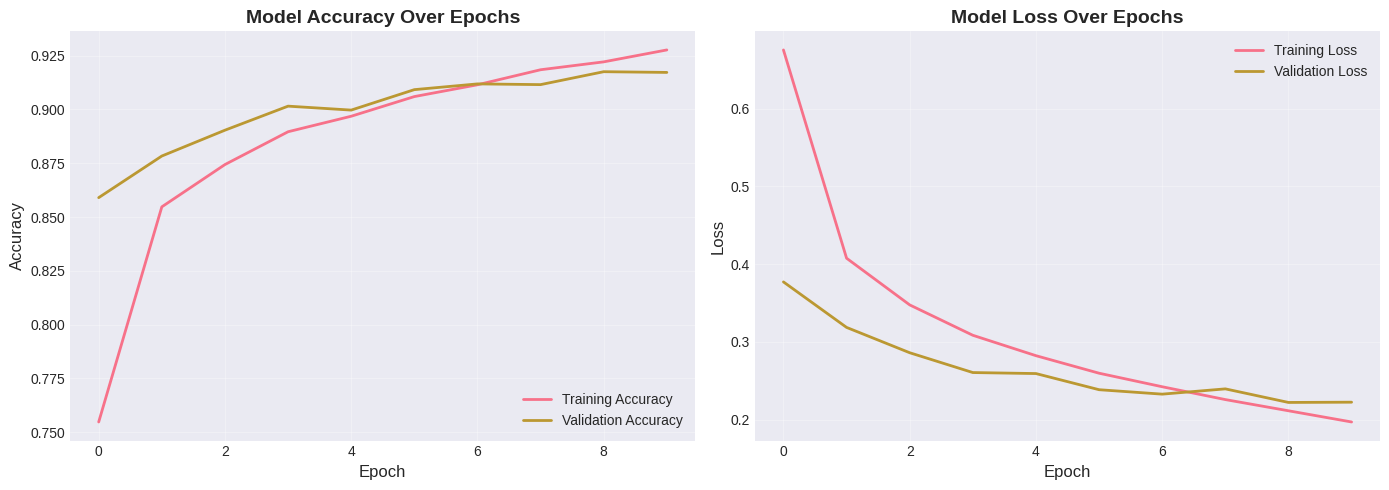


Final Training Accuracy: 0.9276
Final Validation Accuracy: 0.9172
Final Training Loss: 0.1971
Final Validation Loss: 0.2225


In [8]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final training metrics
print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

## Model Evaluation

Now let's evaluate our trained model on the test set to see how well it generalizes to unseen data.

In [9]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)

print("\n" + "="*50)
print("TEST SET PERFORMANCE")
print("="*50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*50)

# Generate predictions
y_pred_probs = model.predict(X_test_reshaped, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"\nGenerated predictions for {len(y_pred)} test samples")


TEST SET PERFORMANCE
Test Loss: 0.2376
Test Accuracy: 0.9154 (91.54%)



Generated predictions for 10000 test samples


### Confusion Matrix

A confusion matrix shows which classes are being confused with each other. This helps identify specific weaknesses in the model.

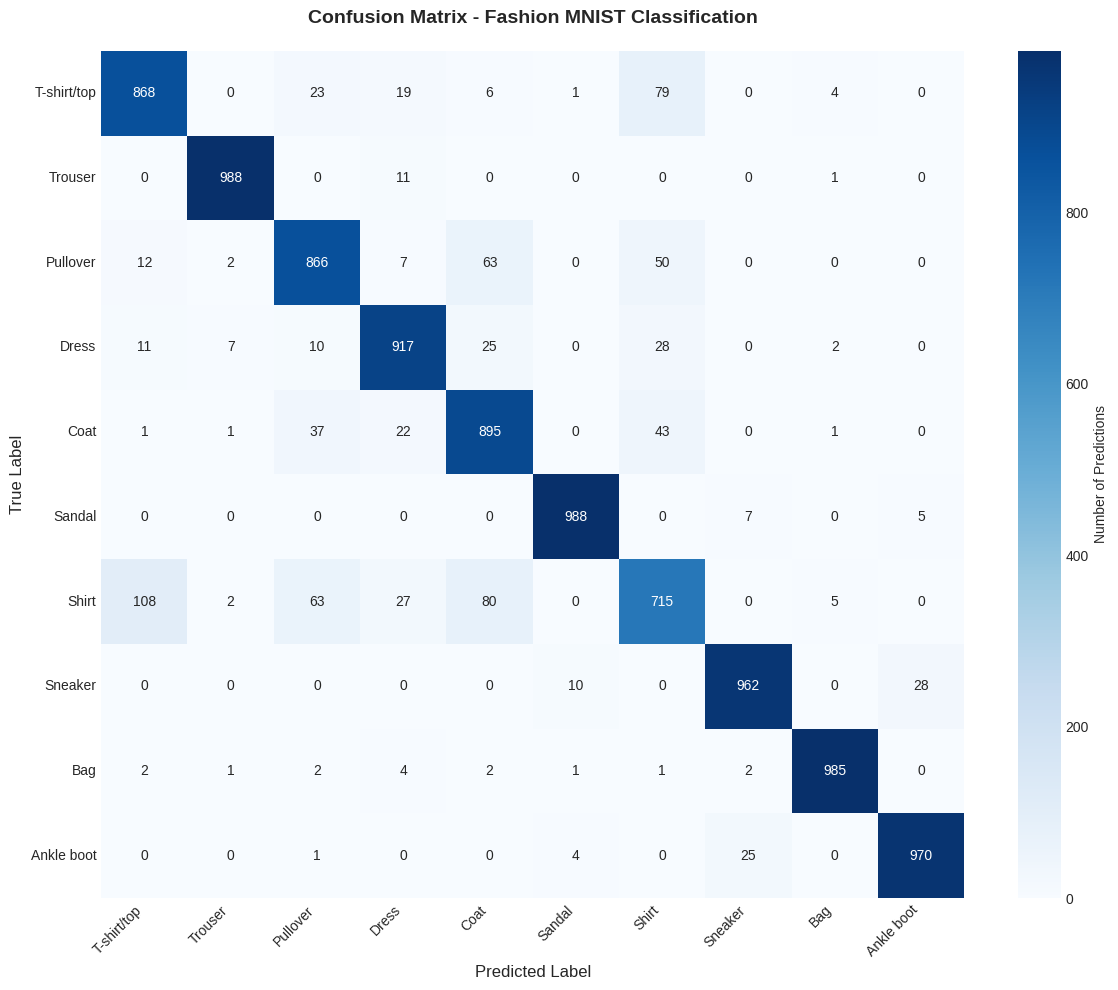


Per-Class Accuracy:
----------------------------------------
T-shirt/top    : 0.8680 (86.80%)
Trouser        : 0.9880 (98.80%)
Pullover       : 0.8660 (86.60%)
Dress          : 0.9170 (91.70%)
Coat           : 0.8950 (89.50%)
Sandal         : 0.9880 (98.80%)
Shirt          : 0.7150 (71.50%)
Sneaker        : 0.9620 (96.20%)
Bag            : 0.9850 (98.50%)
Ankle boot     : 0.9700 (97.00%)


In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - Fashion MNIST Classification', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\nPer-Class Accuracy:")
print("-" * 40)
for i, class_name in enumerate(class_names):
    class_accuracy = cm[i, i] / cm[i, :].sum()
    print(f"{class_name:15s}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

### Detailed Classification Report

The classification report provides precision, recall, and F1-score for each class:

- **Precision**: Of all items predicted as class X, what fraction truly belongs to class X?
- **Recall**: Of all items that truly belong to class X, what fraction did we correctly identify?
- **F1-Score**: Harmonic mean of precision and recall

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

$$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [11]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)

print("\nDetailed Classification Report:")
print("="*70)
print(report)


Detailed Classification Report:
              precision    recall  f1-score   support

 T-shirt/top     0.8663    0.8680    0.8671      1000
     Trouser     0.9870    0.9880    0.9875      1000
    Pullover     0.8643    0.8660    0.8651      1000
       Dress     0.9106    0.9170    0.9138      1000
        Coat     0.8357    0.8950    0.8643      1000
      Sandal     0.9841    0.9880    0.9860      1000
       Shirt     0.7806    0.7150    0.7463      1000
     Sneaker     0.9659    0.9620    0.9639      1000
         Bag     0.9870    0.9850    0.9860      1000
  Ankle boot     0.9671    0.9700    0.9685      1000

    accuracy                         0.9154     10000
   macro avg     0.9148    0.9154    0.9149     10000
weighted avg     0.9148    0.9154    0.9149     10000



## Visualizing Predictions

Let's visualize some predictions to see where our model succeeds and where it struggles.

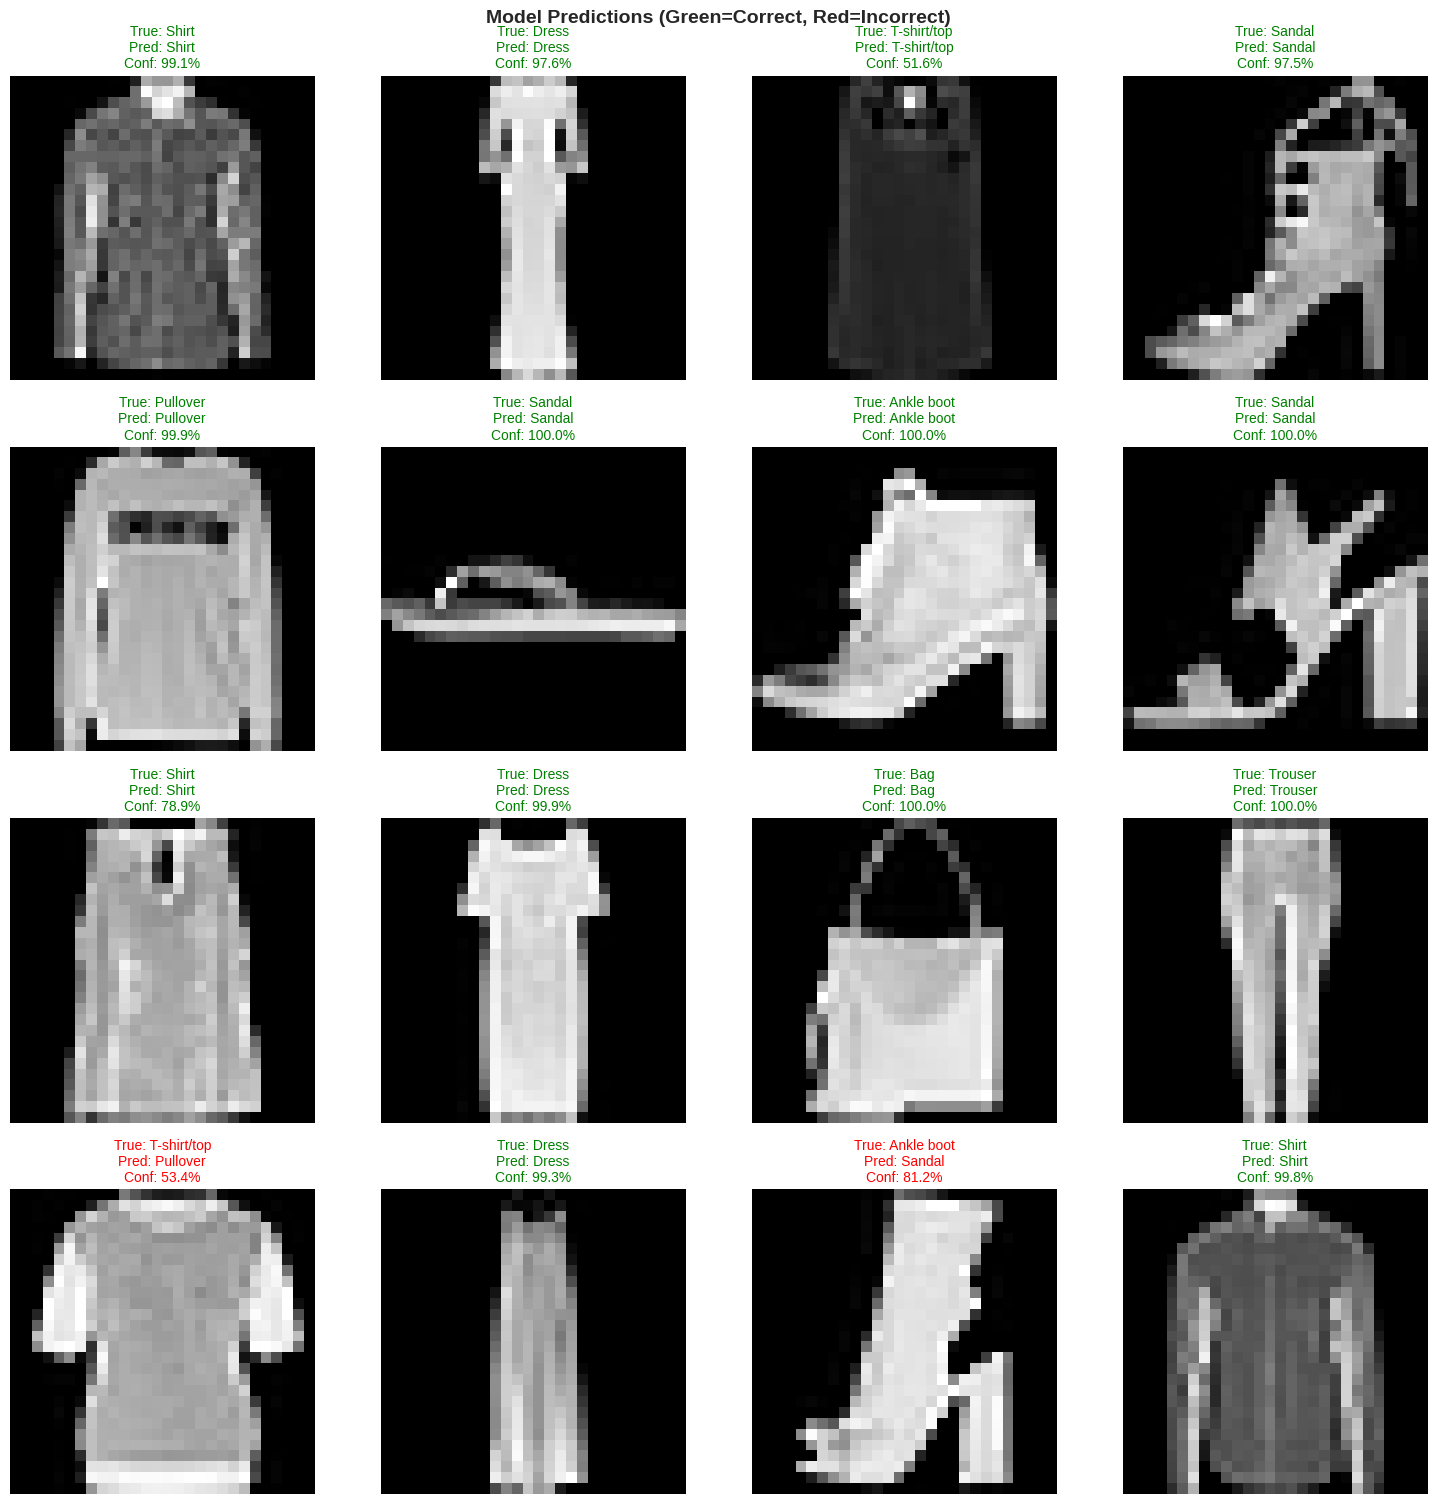

In [12]:
# Function to plot predictions
def plot_predictions(images, true_labels, pred_labels, pred_probs, num_images=16):
    """
    Plot images with their true and predicted labels.
    Correct predictions in green, incorrect in red.
    """
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    axes = axes.ravel()
    
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        
        true_label = class_names[true_labels[i]]
        pred_label = class_names[pred_labels[i]]
        confidence = pred_probs[i][pred_labels[i]] * 100
        
        # Color code: green for correct, red for incorrect
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%",
                         color=color, fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Model Predictions (Green=Correct, Red=Incorrect)', 
                 y=1.00, fontsize=14, fontweight='bold')
    plt.show()

# Plot random predictions
random_indices = np.random.choice(len(X_test), 16, replace=False)
plot_predictions(
    X_test[random_indices],
    y_test[random_indices],
    y_pred[random_indices],
    y_pred_probs[random_indices]
)

### Analyzing Misclassifications

Understanding where the model fails helps us improve it. Let's examine some misclassified examples.

Total misclassified images: 846 out of 10000
Error rate: 8.46%


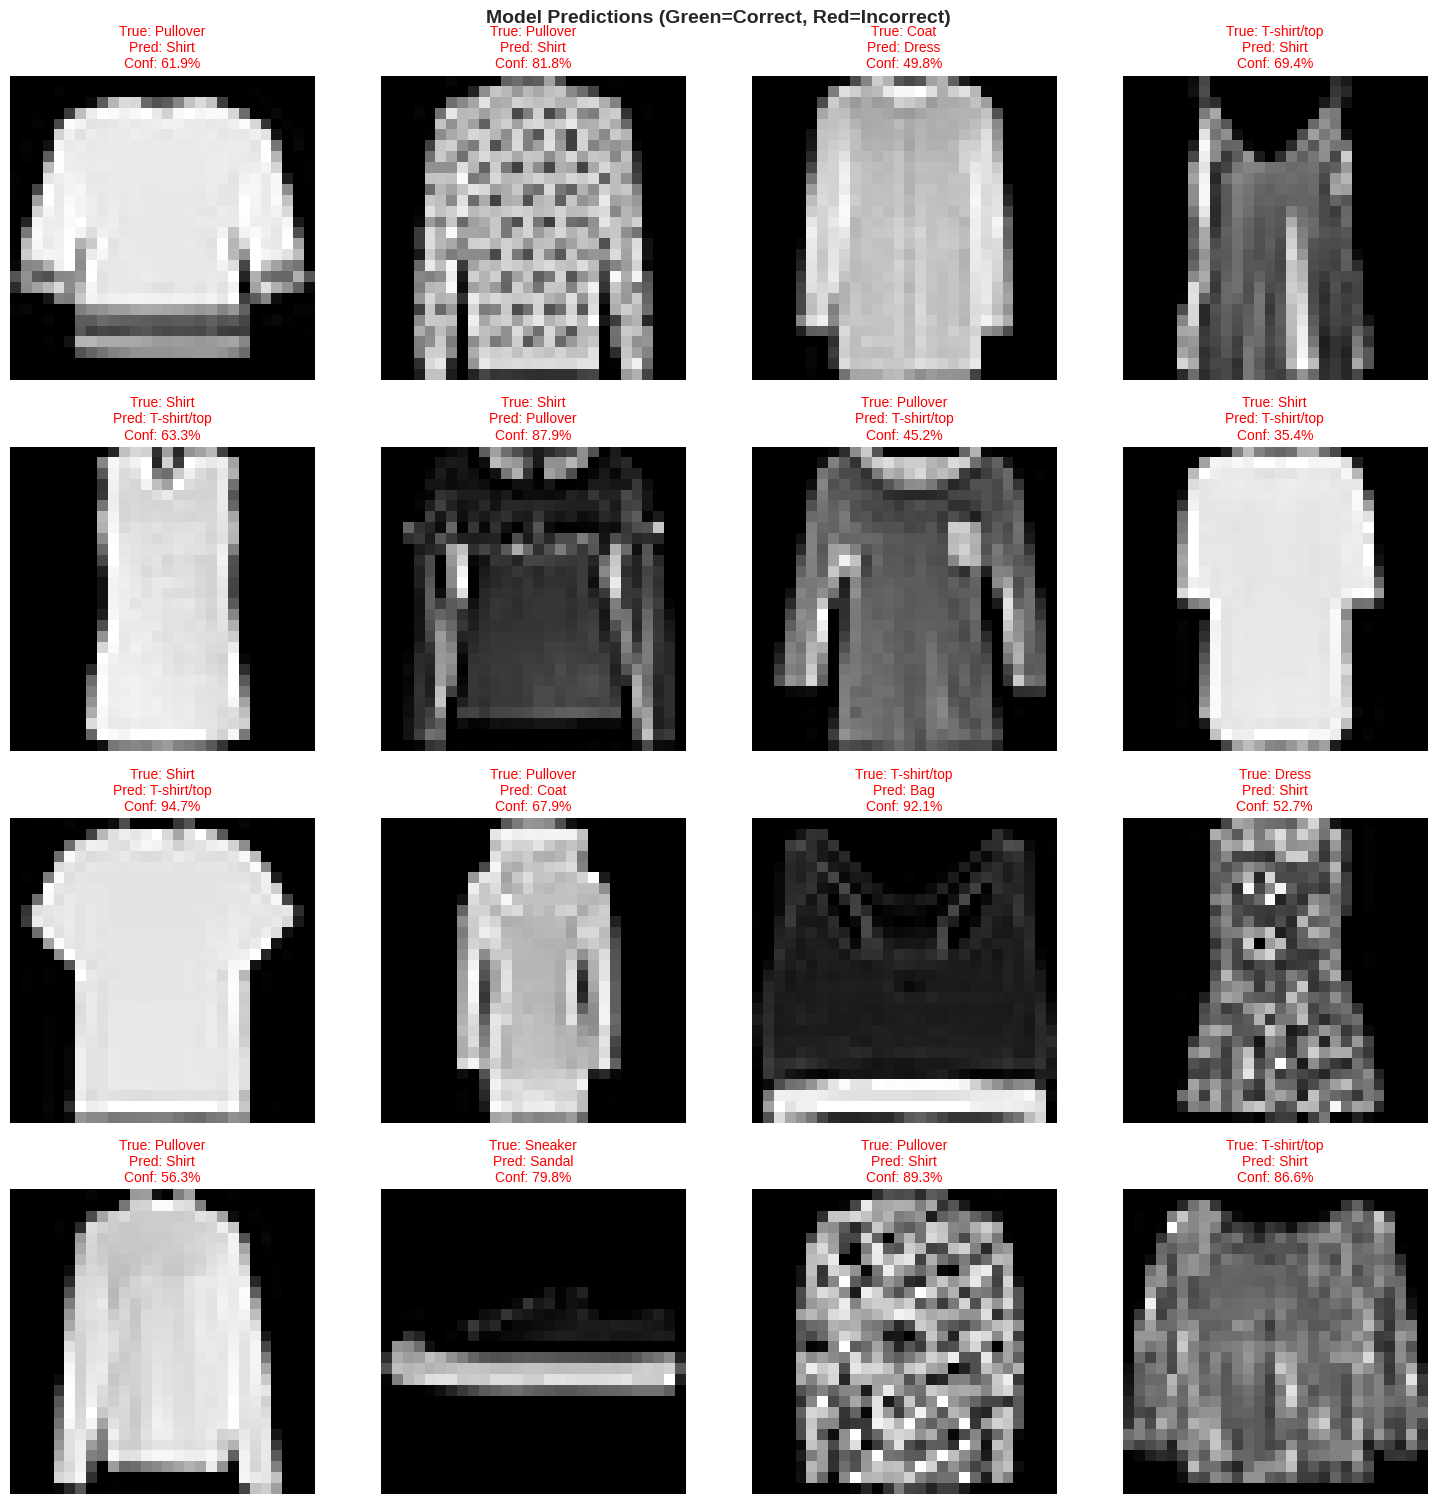

In [13]:
# Find misclassified examples
misclassified_indices = np.where(y_test != y_pred)[0]

print(f"Total misclassified images: {len(misclassified_indices)} out of {len(y_test)}")
print(f"Error rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

if len(misclassified_indices) >= 16:
    # Plot some misclassified examples
    error_samples = np.random.choice(misclassified_indices, 16, replace=False)
    plot_predictions(
        X_test[error_samples],
        y_test[error_samples],
        y_pred[error_samples],
        y_pred_probs[error_samples]
    )
else:
    print("Very few misclassifications! Excellent model performance.")

## Visualizing Learned Features

Let's visualize what the first convolutional layer has learned by examining its filters.

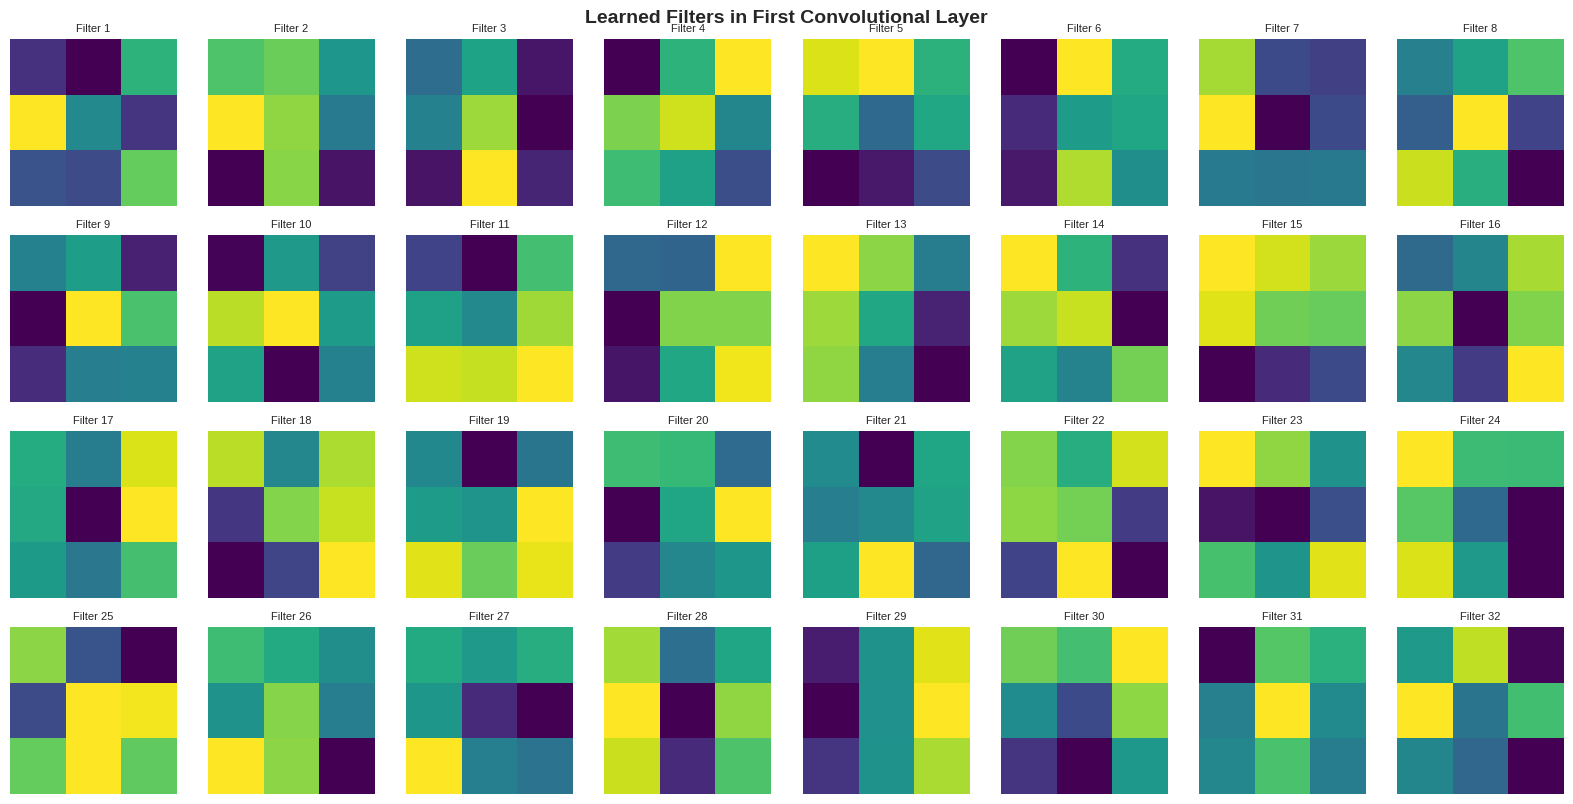


First convolutional layer has 32 filters of size 3x3
These filters detect low-level features like edges and textures


In [14]:
# Get the weights of the first convolutional layer
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

# Normalize filter values for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot the filters
n_filters = 32
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.ravel()

for i in range(n_filters):
    # Get the filter
    f = filters_normalized[:, :, 0, i]
    
    # Plot the filter
    axes[i].imshow(f, cmap='viridis')
    axes[i].set_title(f'Filter {i+1}', fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Learned Filters in First Convolutional Layer', y=1.00, fontsize=14, fontweight='bold')
plt.show()

print(f"\nFirst convolutional layer has {n_filters} filters of size {filters.shape[0]}x{filters.shape[1]}")
print("These filters detect low-level features like edges and textures")

## Hands-On Activity: Making Predictions on New Images

Let's put our trained model to use! We'll select a single image and examine the model's prediction in detail, including the probability distribution across all classes.

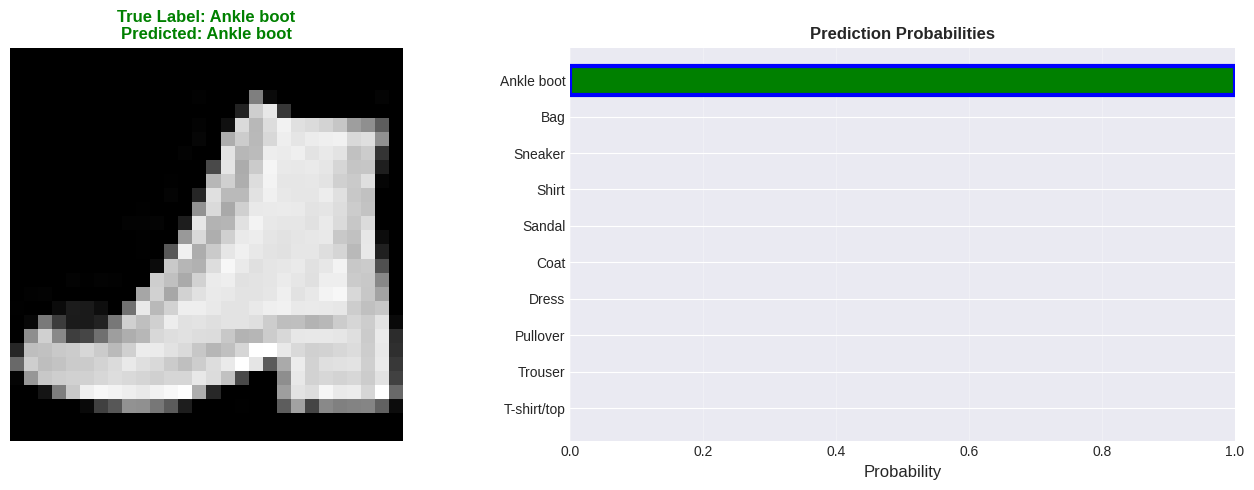


Detailed Prediction:
True Label: Ankle boot
Predicted Label: Ankle boot
Confidence: 100.00%

Top 3 Predictions:
1. Ankle boot     : 100.00%
2. Sneaker        : 0.00%
3. Sandal         : 0.00%


In [15]:
# Select a random test image
sample_idx = np.random.randint(0, len(X_test))
sample_image = X_test_reshaped[sample_idx:sample_idx+1]
true_label = y_test[sample_idx]

# Make prediction
prediction_probs = model.predict(sample_image, verbose=0)[0]
predicted_label = np.argmax(prediction_probs)

# Visualize the image and prediction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the image
ax1.imshow(X_test[sample_idx], cmap='gray')
color = 'green' if predicted_label == true_label else 'red'
ax1.set_title(f"True Label: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}",
             fontsize=12, fontweight='bold', color=color)
ax1.axis('off')

# Plot prediction probabilities
bars = ax2.barh(class_names, prediction_probs)
bars[predicted_label].set_color('green' if predicted_label == true_label else 'red')
bars[true_label].set_edgecolor('blue')
bars[true_label].set_linewidth(3)
ax2.set_xlabel('Probability', fontsize=12)
ax2.set_title('Prediction Probabilities', fontsize=12, fontweight='bold')
ax2.set_xlim([0, 1])
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed prediction information
print("\nDetailed Prediction:")
print("="*50)
print(f"True Label: {class_names[true_label]}")
print(f"Predicted Label: {class_names[predicted_label]}")
print(f"Confidence: {prediction_probs[predicted_label]*100:.2f}%")
print("\nTop 3 Predictions:")
top_3_indices = np.argsort(prediction_probs)[-3:][::-1]
for i, idx in enumerate(top_3_indices, 1):
    print(f"{i}. {class_names[idx]:15s}: {prediction_probs[idx]*100:.2f}%")

## Key Takeaways

Congratulations on completing Day 49! Here are the essential concepts you should take away from this lesson:

- **CNN Architecture**: CNNs use convolutional layers to extract spatial features, pooling layers to reduce dimensionality, and fully connected layers for classification. This hierarchical structure allows them to learn increasingly complex patterns.

- **Image Preprocessing**: Normalizing pixel values and proper data formatting (adding channel dimensions, one-hot encoding labels) are crucial steps before training CNNs.

- **Model Building with Keras**: The Sequential API provides an intuitive way to stack layers and build CNN architectures. TensorFlow/Keras handles the complex mathematics of backpropagation automatically.

- **Regularization Techniques**: Dropout is an effective technique to prevent overfitting by randomly deactivating neurons during training, forcing the network to learn robust features.

- **Evaluation Metrics**: Beyond accuracy, examining confusion matrices, per-class precision/recall, and misclassified examples provides deeper insights into model performance and weaknesses.

- **Feature Learning**: Convolutional filters in early layers detect low-level features (edges, textures), while deeper layers combine these into high-level representations (shapes, objects).

You should now be able to:
- Design and implement CNN architectures for image classification tasks
- Train models efficiently using batching and validation
- Evaluate model performance using multiple metrics
- Diagnose issues like overfitting through training curves
- Make predictions on new images with trained models

## Further Resources

To deepen your understanding of CNNs and image classification:

1. **TensorFlow/Keras Documentation**:
   - [Keras Conv2D Layer](https://keras.io/api/layers/convolution_layers/convolution2d/)
   - [TensorFlow Image Classification Tutorial](https://www.tensorflow.org/tutorials/images/classification)

2. **Foundational Papers**:
   - "ImageNet Classification with Deep Convolutional Neural Networks" (AlexNet) - Krizhevsky et al., 2012
   - "Very Deep Convolutional Networks for Large-Scale Image Recognition" (VGG) - Simonyan & Zisserman, 2014

3. **Online Courses and Tutorials**:
   - [Stanford CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)
   - [Fast.ai Practical Deep Learning for Coders](https://course.fast.ai/)

4. **Books**:
   - "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville (Chapter 9 on CNNs)
   - "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron

5. **Datasets for Practice**:
   - [CIFAR-10/CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html): Small color images in 10/100 categories
   - [ImageNet](https://www.image-net.org/): Large-scale image database
   - [Kaggle Datasets](https://www.kaggle.com/datasets): Various real-world image classification challenges

### Next Steps

In the upcoming lessons, you'll explore:
- Transfer learning with pre-trained models (VGG, ResNet, Inception)
- Data augmentation techniques to improve model generalization
- Advanced CNN architectures and their innovations
- Recurrent Neural Networks (RNNs) for sequence processing

Keep practicing and experimenting with different architectures and datasets!